<a href="https://colab.research.google.com/github/SwarnaSriBhanu/Crop/blob/main/crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Loading the dataset
# The 'on_bad_lines='skip'' argument tells pandas to skip any rows
# that cause parsing errors, like having too many fields.
crop = pd.read_csv('Crop_recommendation.csv', on_bad_lines='skip')

In [19]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [20]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2191,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2192,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2193,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2194,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2195,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [21]:
crop.shape

(2196, 8)

In [22]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2196 non-null   int64  
 1   P            2196 non-null   int64  
 2   K            2196 non-null   int64  
 3   temperature  2196 non-null   float64
 4   humidity     2196 non-null   float64
 5   ph           2196 non-null   float64
 6   rainfall     2196 non-null   float64
 7   label        2196 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.4+ KB


In [23]:
crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2191,False,False,False,False,False,False,False,False
2192,False,False,False,False,False,False,False,False
2193,False,False,False,False,False,False,False,False
2194,False,False,False,False,False,False,False,False


In [24]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [25]:
crop.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2191,False
2192,False
2193,False
2194,False


In [26]:
crop.duplicated().sum()

0

In [27]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000
mean,50.575137,53.348816,48.200364,25.606145,71.514475,6.471270,103.395421
std,36.946829,33.013442,50.679779,5.062442,22.264777,0.773250,54.959662
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.764337,60.275383,5.972817,64.509670
50%,37.000000,51.000000,32.000000,25.581418,80.495762,6.426829,94.772563
75%,85.000000,68.000000,49.000000,28.550191,89.986532,6.924154,123.791629
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [28]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [29]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [30]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


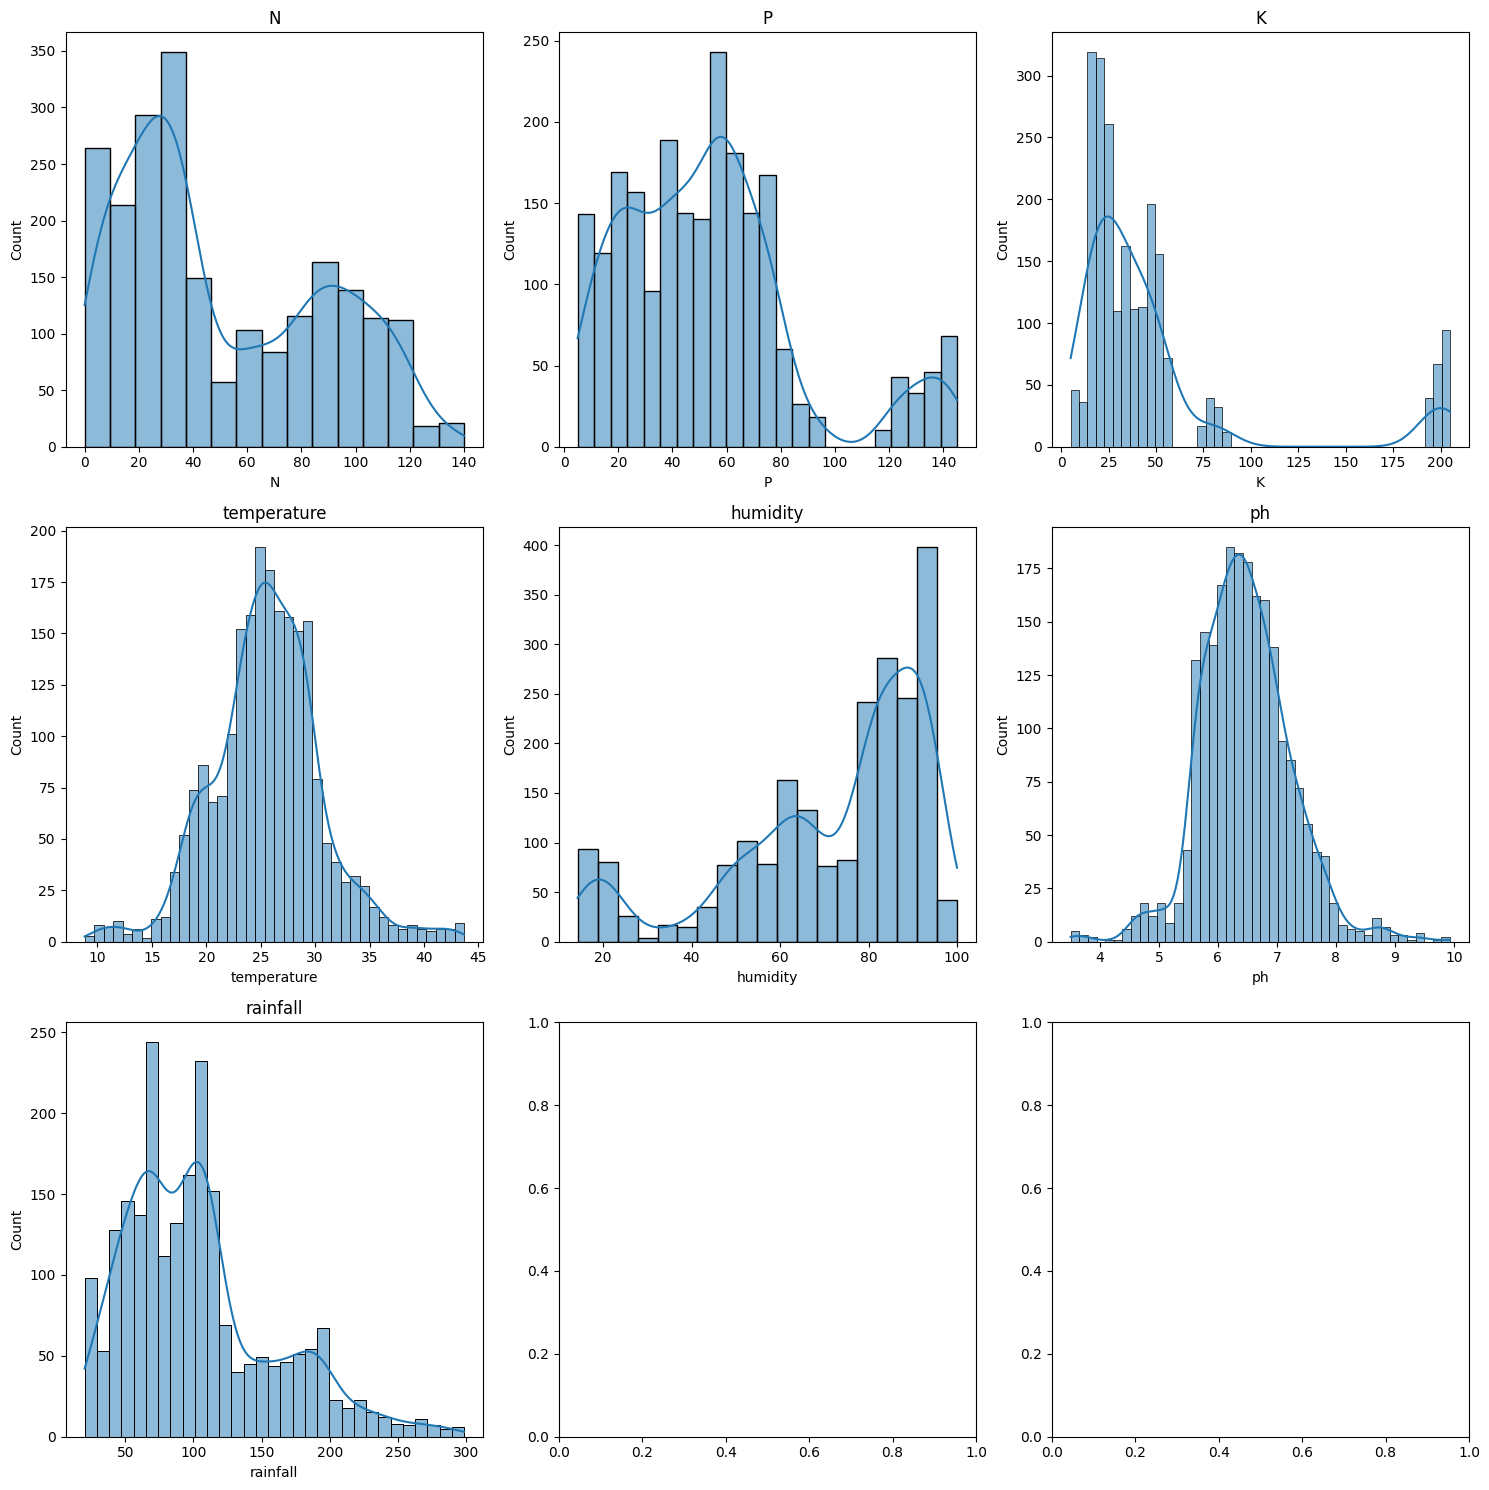

In [33]:
#visualize
fig,ax = plt.subplots(3 , 3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
     sns.histplot(crop[i], ax=subplot, kde=True)
     subplot.set_title(i)
plt.tight_layout()
plt.show()

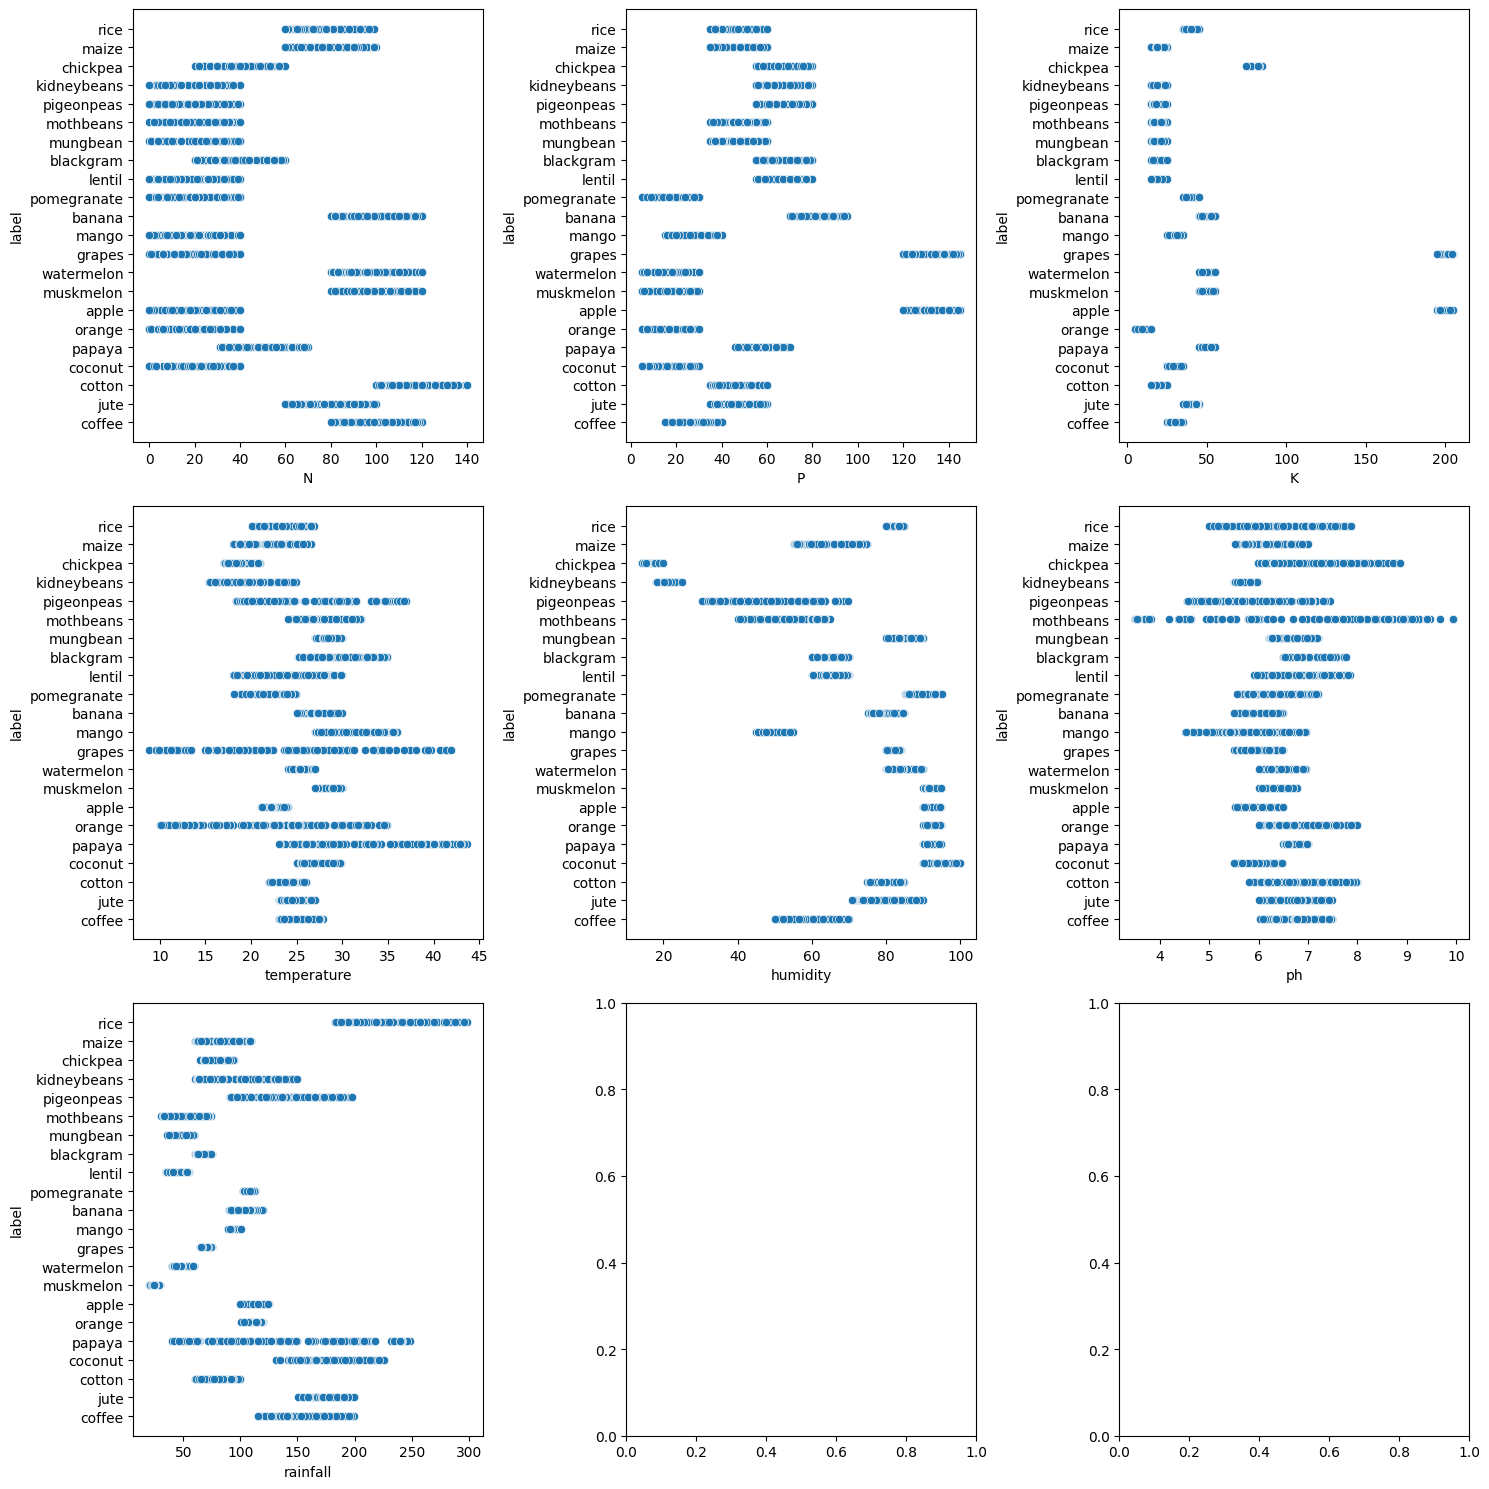

In [36]:
#PLOTTING SCATTER PLOT
fig , ax= plt.subplots(3, 3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

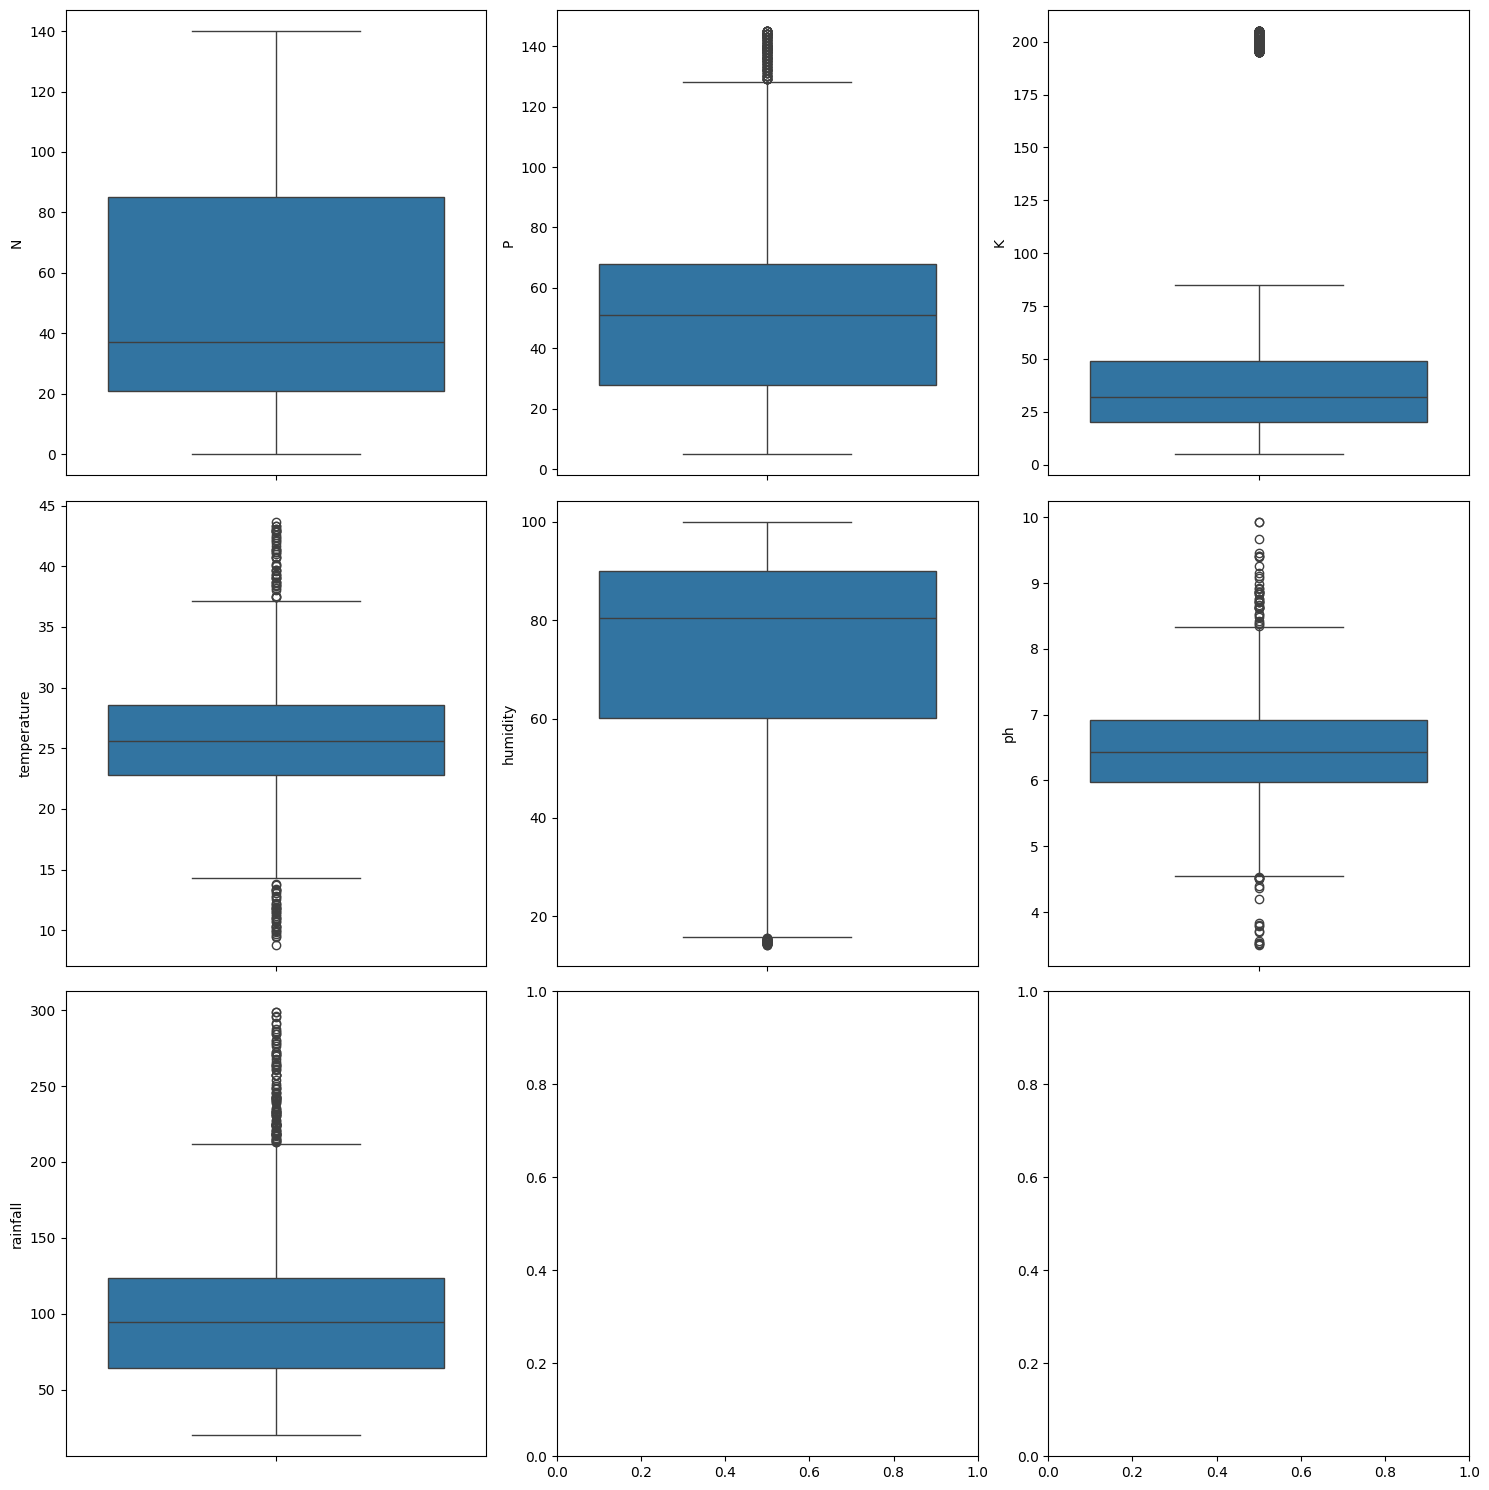

In [37]:
#FINDING OUTLIERS - BOXPLOT
fig, ax=plt.subplots(3,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()


In [38]:
#CORRELATION OF THE FEATURES
num_cols = crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2191,107,34,32,26.774637,66.413269,6.780064,177.774507
2192,99,15,27,27.417112,56.636362,6.086922,127.924610
2193,118,33,30,24.131797,67.225123,6.362608,173.322839
2194,117,32,34,26.272418,52.127394,6.758793,127.175293


In [39]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231367,-0.140918,0.027214,0.190391,0.096073,0.059473
P,-0.231367,1.000000,0.736728,-0.128160,-0.118497,-0.137708,-0.064153
K,-0.140918,0.736728,1.000000,-0.159504,0.190249,-0.171132,-0.052821
temperature,0.027214,-0.128160,-0.159504,1.000000,0.207618,-0.015430,-0.031874
humidity,0.190391,-0.118497,0.190249,0.207618,1.000000,-0.009975,0.096197
ph,0.096073,-0.137708,-0.171132,-0.015430,-0.009975,1.000000,-0.107986
rainfall,0.059473,-0.064153,-0.052821,-0.031874,0.096197,-0.107986,1.000000


<Axes: >

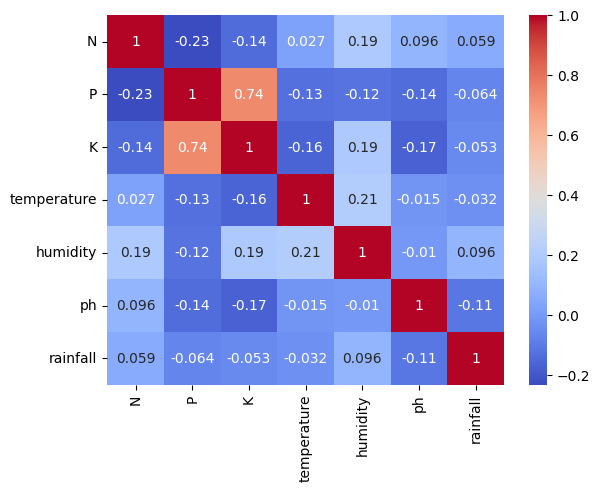

In [40]:
#VISUALIZING WITH HEATMAP
sns.heatmap(corr, annot=True, cmap='coolwarm')

ENCODING

In [41]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [43]:
crop_dict = {'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5, 'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10, 'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20, 'jute': 21, 'coffee': 22}

In [44]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.0


In [45]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2191,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22.0
2192,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22.0
2193,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22.0
2194,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22.0
2195,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22.0


In [46]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2191,107,34,32,26.774637,66.413269,6.780064,177.774507,22.0
2192,99,15,27,27.417112,56.636362,6.086922,127.924610,22.0
2193,118,33,30,24.131797,67.225123,6.362608,173.322839,22.0
2194,117,32,34,26.272418,52.127394,6.758793,127.175293,22.0
2195,104,18,30,23.603016,60.396475,6.779833,140.937041,22.0
